<a href="https://colab.research.google.com/github/Hamerson-jhoel/S-Sistemas-2025-1/blob/main/Carpeta3_youtube_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#cargar datos desde drive acceso libre
#https://docs.google.com/spreadsheets/d/1d__TtJbs10zkZDSXH6efwKPuKKBLPPQW/edit?usp=sharing&ouid=103591846109822754972&rtpof=true&sd=true
FILEID = "1d__TtJbs10zkZDSXH6efwKPuKKBLPPQW" #"1DxI5wQpqEWksw2BqJnG7n0IgNQ_xByX-"

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O  canciones.xlsx && rm -rf /tmp/cookies.txt
#!unzip -o codigos.zip
!dir

--2025-05-29 22:30:32--  https://docs.google.com/uc?export=download&confirm=&id=1d__TtJbs10zkZDSXH6efwKPuKKBLPPQW
Resolving docs.google.com (docs.google.com)... 74.125.204.101, 74.125.204.139, 74.125.204.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.204.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1d__TtJbs10zkZDSXH6efwKPuKKBLPPQW&export=download [following]
--2025-05-29 22:30:32--  https://drive.usercontent.google.com/download?id=1d__TtJbs10zkZDSXH6efwKPuKKBLPPQW&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.157.132, 2404:6800:4008:c13::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.157.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10532 (10K) [application/octet-stream]
Saving to: ‘canciones.xlsx’

canciones.xlsx      100%[===================>]  10.29K  --.-K

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_ = 'canciones.xlsx'#leer archivo xlsx con link, band, type
X  = pd.read_excel(file_)
X#imprimir filas iniciales

,link,band,type,type_num
0,https://www.youtube.com/watch?v=UlsVL56r5vc,kjarkas,folklorica,1
1,https://www.youtube.com/watch?v=locPdV3irM0,kjarkas,folklorica,1
2,https://www.youtube.com/watch?v=_NEz5nqRT5k,kjarkas,folklorica,1
3,https://www.youtube.com/watch?v=PZngNEYZouc,kjarkas,folklorica,1
4,https://www.youtube.com/watch?v=6H3QwNrk_WU,kjarkas,folklorica,1
5,https://www.youtube.com/watch?v=IhnOpwOMHgk,la_union,pop_rock,2
6,https://www.youtube.com/watch?v=6bIimzl5NYM,duncan_du,pop_rock,2
7,https://www.youtube.com/watch?v=BRuHGchMrD8,enanitos_verdes,pop_rock,2
8,https://www.youtube.com/watch?v=T_FkEw27XJ0,soda_stereo,pop_rock,2
9,https://www.youtube.com/watch?v=OhXeBoTlCr4,mana,pop_rock,2


In [3]:
#instalar librerias necesarias para descargar audios youtube
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile

# Paquete de carga de cookies para el control anti-bots captcha
!pip install browser-cookie3

import os
import yt_dlp as youtube_dl
import browser_cookie3

try:
    cookies = browser_cookie3.firefox()
except:
    print("No se pueden descargar cookies desde firefox. Intentando Chrome...")
    try:
        cookies = browser_cookie3.chrome()
    except:
        print("No se pueden descargar cookies desde Chrome. Por favor asegúrate de estar logueado en Youtube desde tu navegador.")
        cookies = None

#funcion para descargar mp3 desde youtube
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':f'{name}.mp3',
    }
    if cookies:
        options['cookiefile'] = None
        options['cookiejar'] = cookies;

    with youtube_dl.YoutubeDL(options) as ydl:
        try:
            video_info = ydl.extract_info(video_url, download=False)
            ydl.download([video_info['webpage_url']])
            print("Download complete... {}".format(filename))
        except Exception as e:
            print(f"Error descargando {video_url}: {e}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 9.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for yt-dlp: filename=yt_dlp-2025.5.22-py3-none-any.whl size=3011500 sha256=97c7e0160f057b0c5a07c2137be17e1ce66fbf33e740f43868063d2e5f26031a
  Stored in directory: /tmp/pip-ephem-wheel-cache-2gsax_op/wheels/2d/79/97/7209650ef73114e0fe0603480da012ad3afacb9cae6b8acd9a
Successfully built yt-dlp
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.2 MB/s eta 0:00:00
No se pueden descargar cookies desde firefox. Intentando Chrome...
No se pueden descargar cookies desde Chrome. Por favor asegúrate de estar logueado en Youtube desde tu navegador.


In [4]:
import subprocess
import os

#crear carpeta con resultados
try:
  os.mkdir('results')
except:
  print("Carpeta results ya existe")

#recorrer excel con videos
N, P = X.shape
Ns = N * 5 #cantidad de segmentos por cancion

for n in range(N):
    print(f"video {n+1} de {N}")
    print(f"link: {X.loc[n,'link']}\n")
    print(f"band: {X.loc[n,'band']}\n")
    print(f"type: {X.loc[n,'type']}\n")
    #ruta video n-th
    name_ = 'results/'+X.loc[n,'band']+"_"+str(n)+"_"+str(X.loc[n,'type_num']) # #video+nombre+tipo de genero musical
    #descargar mp3 desde youtube
    try: # Added try block to catch download errors
        download_ytvid_as_mp3(X.loc[n,'link'],name_)
        #convertir a .wav
        subprocess.call(['ffmpeg','-y', '-i', name_+'.mp3',
                       name_+'.wav'])
    except youtube_dl.utils.DownloadError as e: # Catch the specific DownloadError
        print(f"Skipping video {X.loc[n,'link']} due to download error: {e}") # Print a message and skip

video 1 de 10
link: https://www.youtube.com/watch?v=UlsVL56r5vc

band: kjarkas

type: folklorica

[youtube] Extracting URL: https://www.youtube.com/watch?v=UlsVL56r5vc
[youtube] UlsVL56r5vc: Downloading webpage
[youtube] UlsVL56r5vc: Downloading tv client config
[youtube] UlsVL56r5vc: Downloading player 91e7c654-main
[youtube] UlsVL56r5vc: Downloading tv player API JSON
[youtube] UlsVL56r5vc: Downloading ios player API JSON
[youtube] UlsVL56r5vc: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=UlsVL56r5vc
[youtube] UlsVL56r5vc: Downloading webpage
[youtube] UlsVL56r5vc: Downloading tv client config
[youtube] UlsVL56r5vc: Downloading tv player API JSON
[youtube] UlsVL56r5vc: Downloading ios player API JSON
[youtube] UlsVL56r5vc: Downloading m3u8 information
[info] UlsVL56r5vc: Downloading 1 format(s): 251
[download] Destination: results/kjarkas_0_1.mp3
[download] 100% of    3.49MiB in 00:00:00 at 4.92MiB/s   
Error descargando https://www.youtube.c

In [5]:
#cargar .wavs y partir audios
#lista archivos .wav
path = 'results/'
wav_files = [f for f in os.listdir(path) if f.endswith('.wav')]
wav_files

['duncan_du_6_2.wav',
 'enanitos_verdes_7_2.wav',
 'mana_9_2.wav',
 'soda_stereo_8_2.wav',
 'kjarkas_2_1.wav',
 'kjarkas_1_1.wav',
 'kjarkas_0_1.wav',
 'kjarkas_4_1.wav',
 'la_union_5_2.wav',
 'kjarkas_3_1.wav']

In [6]:
import soundfile as sf # para instalar pip install soundfile
from scipy.signal import resample_poly


#leer archivos y crear np.array audios
fs = 48000
tl = np.array([30,40,50,60,70,80]) #puntos lectura
ts = 5 #t segmento
Ns = len(wav_files)*len(tl) #cantidad segmentos
x_t = np.zeros((Ns,int(ts*fs),2)) #Ns segmentos, cantidad de muestras, 2 canales (stereo)
label = np.zeros((Ns,1)) #vector tipo de genero
type_c = X['type'].unique()
name_c = []
#leer archivos wav
i = 0
for name in wav_files:#lectura audio .wav
    x, fs_i = sf.read(path+name)
    for ti in tl: #segmentos de tiempo
        print(name,'x',x.shape,'fs actual:',fs_i)
        xc = x[int(fs*ti):int(fs*(ti+ts)),:]
        if fs_i < fs:
          # Resample using resample_poly
          gcd = np.gcd(fs, fs_i)
          up = fs // gcd
          down = fs_i // gcd
          xc = resample_poly(x, up=up, down=down)
        x_t[i] = xc
        label[i] = int(name[-5]) #tipo de genero
        name_c += [name[:-6]]
        print(f"{i} lectura: {name}; segundo {ti}:{ti+ts}; tipo música: {type_c[int(label[i])-1]}")
        i+=1
x_t.shape

duncan_du_6_2.wav x (11254805, 2) fs actual: 48000
0 lectura: duncan_du_6_2.wav; segundo 30:35; tipo música: pop_rock
duncan_du_6_2.wav x (11254805, 2) fs actual: 48000
1 lectura: duncan_du_6_2.wav; segundo 40:45; tipo música: pop_rock
duncan_du_6_2.wav x (11254805, 2) fs actual: 48000
2 lectura: duncan_du_6_2.wav; segundo 50:55; tipo música: pop_rock
duncan_du_6_2.wav x (11254805, 2) fs actual: 48000
3 lectura: duncan_du_6_2.wav; segundo 60:65; tipo música: pop_rock
duncan_du_6_2.wav x (11254805, 2) fs actual: 48000
4 lectura: duncan_du_6_2.wav; segundo 70:75; tipo música: pop_rock
duncan_du_6_2.wav x (11254805, 2) fs actual: 48000
5 lectura: duncan_du_6_2.wav; segundo 80:85; tipo música: pop_rock


<ipython-input-6-9c4765d5839d>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"{i} lectura: {name}; segundo {ti}:{ti+ts}; tipo música: {type_c[int(label[i])-1]}")


enanitos_verdes_7_2.wav x (10666880, 2) fs actual: 48000
6 lectura: enanitos_verdes_7_2.wav; segundo 30:35; tipo música: pop_rock
enanitos_verdes_7_2.wav x (10666880, 2) fs actual: 48000
7 lectura: enanitos_verdes_7_2.wav; segundo 40:45; tipo música: pop_rock
enanitos_verdes_7_2.wav x (10666880, 2) fs actual: 48000
8 lectura: enanitos_verdes_7_2.wav; segundo 50:55; tipo música: pop_rock
enanitos_verdes_7_2.wav x (10666880, 2) fs actual: 48000
9 lectura: enanitos_verdes_7_2.wav; segundo 60:65; tipo música: pop_rock
enanitos_verdes_7_2.wav x (10666880, 2) fs actual: 48000
10 lectura: enanitos_verdes_7_2.wav; segundo 70:75; tipo música: pop_rock
enanitos_verdes_7_2.wav x (10666880, 2) fs actual: 48000
11 lectura: enanitos_verdes_7_2.wav; segundo 80:85; tipo música: pop_rock
mana_9_2.wav x (12638709, 2) fs actual: 48000
12 lectura: mana_9_2.wav; segundo 30:35; tipo música: pop_rock
mana_9_2.wav x (12638709, 2) fs actual: 48000
13 lectura: mana_9_2.wav; segundo 40:45; tipo música: pop_rock


(60, 240000, 2)

In [7]:
from IPython.display import Audio #reproducir segmento
i = 49
Audio(x_t[i].T,rate=fs)

In [8]:
#calculo de fourier
vf = np.fft.rfftfreq(x_t.shape[1],1/fs) #calculo vector de frecuencias
Xw = np.fft.rfft(x_t,axis=1).mean(axis=-1) #transformada rapida de Fourier para señal Real a lo largo del tiempo (axis=1) y se promedian los dos canales
Xw.shape

(60, 120001)

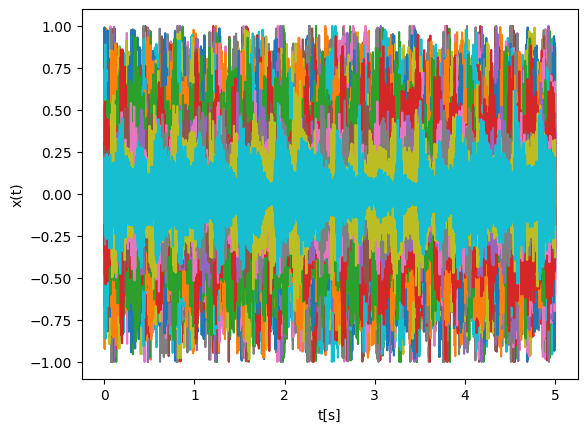

In [9]:
#grafica tiempo y fourier
plt.plot(np.arange(0,ts,1/fs),x_t.mean(axis=-1).T) #se promedian los dos canales stereo
plt.xlabel('t[s]')
plt.ylabel('x(t)')
plt.show()

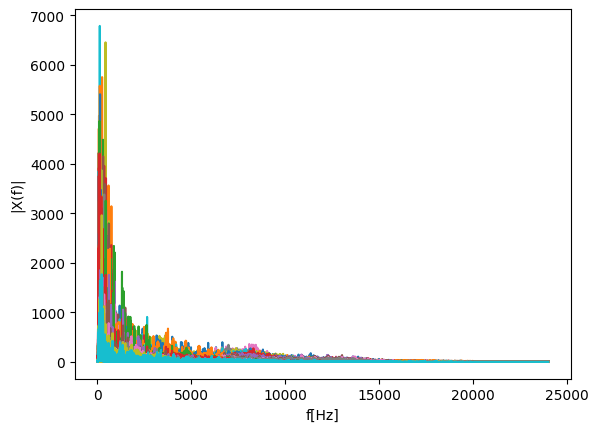

In [10]:
plt.plot(vf,abs(Xw).T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

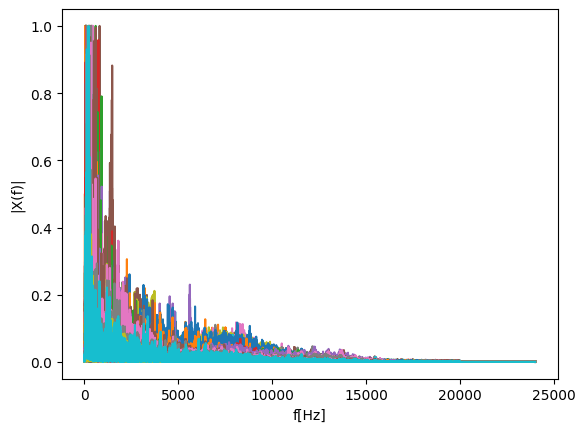

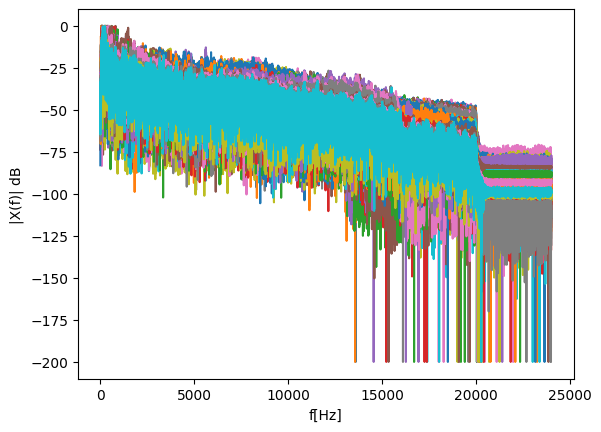

In [11]:
#se normalizan espectros entre 0 y 1 para evitar inconsistencias por ampliltudes máximas
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
Xw_ = sca.fit_transform(abs(Xw).T).T

plt.plot(vf,Xw_.T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

#en dB
plt.plot(vf,(20*np.log10(Xw_+1e-10)).T) # se suma 1e-10 para evitar discontinuidad del log
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)| dB')
plt.show()

**Nota**: Generalmente el espectro se presenta en [decibeles [dB]](https://es.wikipedia.org/wiki/Decibelio)

## Visualización de los datos en 2D

In [12]:
from umap import UMAP
#visualización de datos
n_neighbors = int(2*np.sqrt(Xw_.shape[0]))
sca_ = MinMaxScaler()

red_ = UMAP(n_components=2,n_neighbors=n_neighbors)
X_2D = sca_.fit_transform(red_.fit_transform(Xw_))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


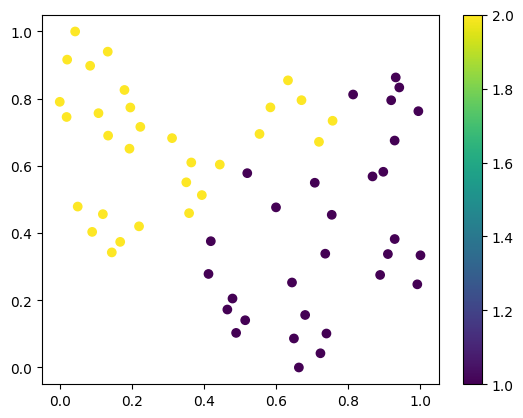

<ipython-input-13-4de72788607f>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.text(X_2D[i,0]*1.025,X_2D[i,1]*1.025, tex[:-2]+"_"+str(i), fontsize=6,color=color_[int(label[i]-1)])


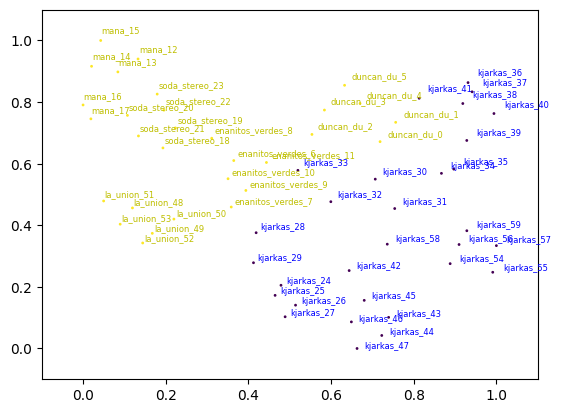

In [13]:
#graficar separabilidad 2D
plt.scatter(X_2D[:,0],X_2D[:,1],c=label)
plt.colorbar()
plt.show()

color_ = ["b","y"]
#nombre cancion
plt.scatter(X_2D[:,0],X_2D[:,1],c=label,s=1)
for i, tex in enumerate(name_c):
    #print(f"{i} {tex}")
    plt.text(X_2D[i,0]*1.025,X_2D[i,1]*1.025, tex[:-2]+"_"+str(i), fontsize=6,color=color_[int(label[i]-1)])

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.show()

In [14]:
#reproducir audio
i = 55
Audio(x_t[i].T,rate=fs)

# Predicción del género musical sobre espectro de Fourier

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Crear una instancia del clasificador RandomForest
model = KNeighborsClassifier(n_neighbors=5)

# Realizar la validación cruzada
# Xw_ son tus características y label son tus etiquetas
# cv define el número folds para la validación cruzada
scores = cross_val_score(model, Xw_, label.ravel(), cv=5,scoring='accuracy')

# Imprimir los resultados de la validación cruzada
print("Acierto para cada Fold:", scores)
print("Acierto promedio:", scores.mean())
print("Desviación estándar del Acierto:", scores.std())

#entrenar modelo para predecir nuevas canciones
model.fit(Xw_, label.ravel())

Acierto para cada Fold: [0.83333333 0.66666667 0.58333333 0.75       0.66666667]
Acierto promedio: 0.7
Desviación estándar del Acierto: 0.08498365855987976


KNeighborsClassifier()

In [16]:
import joblib
#guardar modelo
try:
  os.mkdir('modelo')
except:
  print("Carpeta modelo ya existe")

filename_ = 'modelo/folklorica_vs_poprock'
model_ ={'Xw_':Xw_, 'label' : label, 'name_c' : name_c, 'vf':vf,'fs':fs, 'modelo':model,'type':X['type'].unique()}
joblib.dump(model_,filename_+".pkl")


['modelo/folklorica_vs_poprock.pkl']

In [17]:
#descargar modelo
#guardar resultados
from google.colab import files
from datetime import date, datetime
import shutil
#guardar resultados
namefile = str(datetime.now().strftime("%Y_%m_%d_%H_%M_%d"))+'modelo'
shutil.make_archive(namefile, 'zip', 'modelo')
files.download(namefile+'.zip')

#el archivo .zip puede cargarse en drive y utilizarse en otro cuaderno para detectar género musical de nuevos segmentos

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Para una nueva canción

In [18]:
#cargar modelo
my_model_loaded = joblib.load(filename_+".pkl")
my_model_loaded.keys()

dict_keys(['Xw_', 'label', 'name_c', 'vf', 'fs', 'modelo', 'type'])

In [19]:
#evaluar para un segmento en fft normalizado

pred_ = my_model_loaded['modelo'].predict(Xw_[0].reshape(1,-1))[0]
print('Etiqueta estimada: ',my_model_loaded['type'][int(pred_-1)])
print('Etiqueta orignal: ',my_model_loaded['type'][int(my_model_loaded['label'][0][0])-1])

Etiqueta estimada:  pop_rock
Etiqueta orignal:  pop_rock
